<a href="https://colab.research.google.com/github/nishu-mns/ML-Labs/blob/main/ML_Lab7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import numpy as np
import pandas as pd
import io
import matplotlib.pyplot as plt

In [78]:
data = pd.read_csv('/content/drive/MyDrive/BuyComputer.csv')
data.drop(columns=['User ID',],axis=1,inplace=True)
data.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [79]:
x= data.iloc[:, [0,1]].values  
y= data.iloc[:, 2].values  

# print(x)
# print(y)

In [80]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.25, random_state=0) 

In [81]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [82]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

LogisticRegression(random_state=0)

In [83]:
y_pred= classifier.predict(x_test)  

In [84]:
from sklearn.metrics import confusion_matrix  
cm = confusion_matrix(y_test,y_pred)  
print(cm)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
acs = accuracy_score(y_test,y_pred)
ps = precision_score(y_test,y_pred)
rs = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
print("Accuracy: ",acs)
print("Precision: ",ps)
print("Recall: ",rs)
print("F1 score: ",f1)

[[65  3]
 [ 8 24]]
Accuracy:  0.89
Precision:  0.8888888888888888
Recall:  0.75
F1 score:  0.8135593220338982


In [85]:
import tensorflow as tf
import random
import math

In [86]:
# Create the bias
bias = random.randint(-100, 100)
# Create the weights
weights = [random.randint(-100, 100) for i in x_train[0]]
params = [bias, *weights]
params

[67, -70, -59]

In [87]:
def sigmoid(z):
    z = max(z, 1e-7)
    z = min(z, 1e+7)
    return (1 / (1 + math.exp(-1 * z)))

In [88]:
def hypothesis(params, x1, x2):
    res = params[0] + x1*params[1] + x2*params[2]
    return (res)

In [89]:
def predict(inputs, params):
    predictions = []
    for inp in inputs:
        res = sigmoid(hypothesis(params, inp[0], inp[1]))
        predictions.append(res)
    return np.array(predictions)

In [90]:
predictions = predict(x_train[:5], params)
predictions

array([1.        , 1.        , 1.        , 0.50000002, 1.        ])

In [91]:
def cost(predictions, y):
    cost = 0
    for i in range(len(predictions)):
        if y[i] == 1:
            cost += (-1 * np.log(predictions[i] + 1e-7))
        else:
            cost += (-1 * np.log(1 - predictions[i] + 1e-7))
    return (cost / len(predictions))

In [92]:
cost(predictions, y[:500])

13.032942779996247

In [93]:
def gradient_descent_update(params, alpha, predictions, targets, features):
    for w in range(len(params)):
        gradient = 0
        for i in range(len(predictions)):
            if w == 0:
                gradient += ((predictions[i] - targets[i]) * 1)
            else:
                gradient += ((predictions[i] - targets[i]) * features[i][w-1])
        gradient /= (2 * len(predictions))
        params[w] = params[w] - (alpha * gradient)
        # print(params)
    return params

In [94]:
def train(features, labels, params, alpha, epochs):
    for i in range(epochs):
        res = predict(features, params)
        gradient_descent_update(params, alpha, res, labels, features)
        loss_values.append(cost(res, labels))
        # print(f"Loss ... {cost(res, labels)}, Params ... [{params}]")

In [95]:
predictions = predict(x_test, params)
print(f"Before training: {cost(predictions, y_test)} ... params = {params}")

epochs = 5000
loss_values = []
epoch_values = [(i + 1) for i in range(epochs)]

train(x_train, y_train, params, 0.1, epochs)
predictions = predict(x_test, params)
print(f"After training: {cost(predictions, y_test)} ... params = {params}")

Before training: 10.950082209667217 ... params = [67, -70, -59]
After training: 0.7589061382516445 ... params = [-21.975779098815785, 17.478003195376385, 5.9185482793122635]


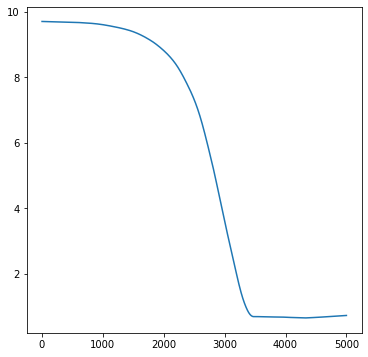

In [96]:
# Plot the epochs vs loss curve
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
plt.plot(epoch_values, loss_values)
plt.show()

In [97]:
def predict_outputs(predictions):
    res = []
    for i in predictions:
        if i >= 0.5:
            res.append(1)
        else:
            res.append(0)
    return res

In [98]:
predictions = predict_outputs(predictions)

In [99]:
precision_score(y_test, predictions)

0.32

In [100]:
accuracy_score(y_test, predictions)

0.32

In [101]:
recall_score(y_test, predictions)

1.0

In [102]:
f1_score(y_test, predictions)

0.48484848484848486

In [103]:
# Exercise Question (5)
predict([[28, 76000]], params)

array([1.])